<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [27]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [28]:
df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                                 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

In [29]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Разделяем на обучающую и тестовую

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [31]:
y_train.shape, y_test.shape

((404,), (102,))

Нормализируем обучающие и тестовые данные (не ответы)

In [32]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_n = mms.fit_transform(X_train)
X_test_n = mms.transform(X_test)

In [33]:
import pickle
with open("mms.pkl", "wb") as f:
    pickle.dump(mms, f)

#### 1.2. Проектируем архитектуру для этой задачи

In [34]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(26, input_shape=(13,), activation='relu'),
    Dense(1, activation='relu')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 26)                  │             364 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 391 (1.53 KB)

 Trainable params: 391 (1.53 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [35]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#### 1.4. Обучаем модель ИНС

In [36]:
history = model.fit(X_train_n, y_train, epochs=20, validation_data=(X_test_n, y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 312.6071 - mae: 14.0718 - val_loss: 78.4470 - val_mae: 7.2198
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 64.7150 - mae: 5.9846 - val_loss: 61.3251 - val_mae: 5.2109
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 45.9352 - mae: 5.0653 - val_loss: 54.7374 - val_mae: 4.7879
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 40.6664 - mae: 4.7264 - val_loss: 83.7696 - val_mae: 6.3689
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 48.0813 - mae: 5.1156 - val_loss: 45.3600 - val_mae: 4.6851
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 29.6588 - mae: 3.8269 - val_loss: 57.7348 - val_mae: 4.8576
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 25.4016 - mae: 3.7421 - val_loss: 46.4346 - val_mae: 4.3189
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 29.4161 - mae: 4.1876 - val_loss: 40.5465 - val_mae: 4.4412
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms

#### 1.6. Делаем предсказания на тестовых данных

In [37]:
preds = model.predict(X_test_n)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [38]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(preds, y_test)

3.706991368649053

#### 1.8. Строим график обучения

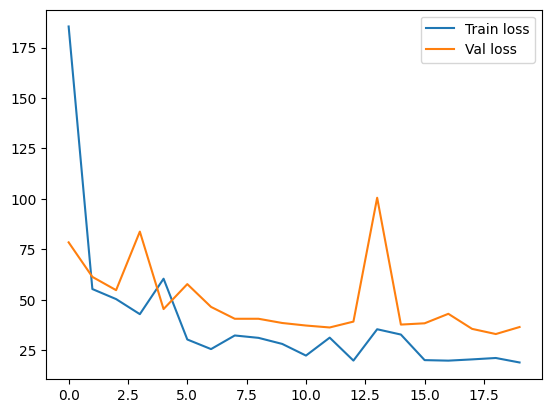

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [40]:
!pip install gradio

In [41]:
import gradio as gr
import numpy as np

def predict_price(crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, b, lstat):
    price = (rm * 1000) - (lstat * 500) - (age * 10) + (chas * 5000)
    return f"{max(price, 0):.2f}"

interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0.006, maximum=89.000, step=0.1, value=0.02985),
        gr.Slider(label="ZN", minimum=0.0, maximum=100.0, step=1, value=0.0),
        gr.Slider(label="INDUS", minimum=0.4, maximum=28.0, step=0.1, value=2.180),
        gr.Slider(label="CHAS", minimum=0.0, maximum=1.0, step=0.1, value=0),
        gr.Slider(label="NOX", minimum=0.3, maximum=0.9, step=0.01, value=0.4580),
        gr.Slider(label="RM", minimum=3.6, maximum=8.8, step=0.1, value=6.4300),
        gr.Slider(label="AGE", minimum=2.9, maximum=100.0, step=0.1, value=58.70),
        gr.Slider(label="DIS", minimum=1.0, maximum=12.2, step=0.1, value=6.062),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=1, value=3),
        gr.Slider(label="TAX", minimum=180, maximum=720, step=1, value=222.0),
        gr.Slider(label="PTRATIO", minimum=2, maximum=22, step=0.1, value=18.70),
        gr.Slider(label="B", minimum=0.3, maximum=397.0, step=0.1, value=394.12),
        gr.Slider(label="LSTAT", minimum=1.7, maximum=38.0, step=0.1, value=5.21),
    ],
    outputs=gr.Text(label="Predicted Price ($)"),
)

interface.launch(debug=False, share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://efa559beb40d33576f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#### 2. Проверка обученной модели пользовательскими данными

In [42]:
def preprocess_input(features, scale_model="mms.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [43]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    features = preprocess_input(features)

    prediction = model.predict(features, verbose=0)

    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  return f"{prediction[0][0] * 1000}"

In [44]:
predict_price([0.02985, 0.00, 2.180, 0, 0.4580,
               6.4300, 58.70, 6.0622, 3, 222.0, 18.70, 394.12, 5.21]) # 28 700 $

'24947.51739501953'

## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [45]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
cv2.imread('/content/animals/chicken/OIP-Gp3iVb6wQlshSNI8KCVgugHaIf.jpeg')

### 3. Указываем путь к набору данных:

In [48]:
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)

### 4. Загружаем набор данных и формируем общую выборку:

In [49]:
# Ваш код
def load_images(imagePaths, compression_size = 32):
  """
  Функция для загрузки изображений и преобразования их в векторы признаков.

  Args:
    imagePaths: список путей к изображениям.
    compression_size: размер сжатия изображения

  Returns:
    data: список векторов признаков (сжатых изображений, преобразованных в векторы).
    labels: список меток классов.
  """

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

data, labels = load_images(imagesPath, 64)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [50]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [64]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels, test_size=0.25, random_state=42)

Преобразование в OneHot Encoding

In [65]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

In [66]:
Y_train, Y_val

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0]]),
 array([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [54]:
# Ваш код
model = Sequential()
model.add(Dense(1024, input_shape=(12288,), activation='relu'))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(len(lb.classes_), activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1024)                │      12,583,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,242,634 (50.52 MB)

 Trainable params: 13,242,634 (50.52 MB)

 Non-trainable params: 0 (0.00 B)

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [56]:
# Ваш код
INIT_LR = 0.01
EPOCHS = 150

#### 5.3. Компилируем модель:

In [57]:
# Ваш код
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [58]:
# Ваш код
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=10) # Остановка обучения, если валидационная точность не улучшается в течение 5 эпох

checkpoint = ModelCheckpoint(filepath="best_model.h5", monitor="val_accuracy", save_best_only=True, verbose=0) # Сохранение модели только при улучшении валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [59]:
# Ваш код
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=EPOCHS, batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.1087 - loss: 209.8705

23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.1090 - loss: 204.8885 - val_accuracy: 0.1156 - val_loss: 2.3093
Epoch 2/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1222 - loss: 2.2876

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.1232 - loss: 2.2879 - val_accuracy: 0.1224 - val_loss: 2.4689
Epoch 3/150
22/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1463 - loss: 2.2612

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.1461 - loss: 2.2618 - val_accuracy: 0.1265 - val_loss: 2.2664
Epoch 4/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1325 - loss: 2.2565 - val_accuracy: 0.1184 - val_loss: 2.3289
Epoch 5/150
17/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1384 - loss: 2.2231

23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.1400 - loss: 2.2281 - val_accuracy: 0.1388 - val_loss: 2.2741
Epoch 6/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1537 - loss: 2.2258 - val_accuracy: 0.1156 - val_loss: 2.3159
Epoch 7/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1647 - loss: 2.2231 - val_accuracy: 0.1320 - val_loss: 2.2441
Epoch 8/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1595 - loss: 2.1966 - val_accuracy: 0.1279 - val_loss: 2.2559
Epoch 9/150
16/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1636 - loss: 2.2067

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.1672 - loss: 2.2022 - val_accuracy: 0.1673 - val_loss: 2.2033
Epoch 10/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1694 - loss: 2.1886 - val_accuracy: 0.1238 - val_loss: 5.3217
Epoch 11/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1205 - loss: 2.8603 - val_accuracy: 0.1252 - val_loss: 2.2751
Epoch 12/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1375 - loss: 2.2688 - val_accuracy: 0.1252 - val_loss: 2.2672
Epoch 13/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1404 - loss: 2.2669 - val_accuracy: 0.1238 - val_loss: 2.2693
Epoch 14/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1454 - loss: 2.2670 - val_accuracy: 0.1238 - val_loss: 2.2681
Epoch 15/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1446 - loss: 2.2730 - val_accuracy: 0.1252 - val_loss: 2.2630
Epoch 16/150
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1359 - loss: 2.2698 - val_accuracy: 0.1265 

#### 6.3. Загружаем лучшую модель:

In [60]:
# Ваш код
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [61]:
# Ваш код
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

         cat       0.00      0.00      0.00        61
         cow       0.00      0.00      0.00        62
         dog       0.13      0.73      0.22        92
     elefant       0.00      0.00      0.00        48
    farfalla       0.00      0.00      0.00        37
     gallina       0.00      0.00      0.00       100
       horse       0.27      0.62      0.38        91
      pecora       0.00      0.00      0.00        69
      spider       0.00      0.00      0.00       105
     squirel       0.00      0.00      0.00        70

    accuracy                           0.17       735
   macro avg       0.04      0.13      0.06       735
weighted avg       0.05      0.17      0.07       735



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 7.2. Выведем матрицу ошибок

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


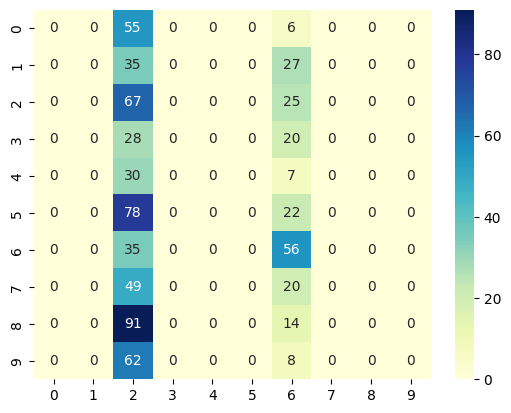

In [62]:
# Ваш код
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

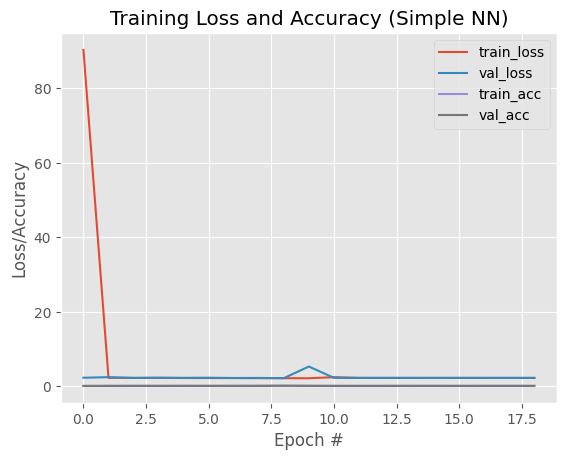

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация N на основе истории обучения
epochs_completed = len(H.history["loss"])
N = np.arange(0, epochs_completed)

plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
plt.show()


### 8. Сохранение модели и меток классов:

In [68]:
# Ваш код
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [69]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [70]:
# Ваш код
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [71]:
# Ваш код
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 64):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [72]:
# Ваш код
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [73]:
# Ваш код
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/animals/chicken/OIP-HE7FDpcfoN9t6ugniCItwwHaE6.jpeg",
              "/content/animals/cow/OIP-1dcLlGo-oFc6UqTUl6yeHwHaEt.jpeg",
              "/content/animals/horse/OIP-0k_R3Nyg6o3p42oKJ_Y0sQAAAA.jpeg",
              "/content/animals/sheep/OIP-5K-RBqkPeoxQq_gSdfHadwAAAA.jpeg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a98837db8e3ec5638.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
